# <span style="color:darkblue"> Lecture 9b - Subsetting and Pivoting Time Data </span>

<font size = "5">


# <span style="color:darkblue"> I. Import Libraries and Data</span>

<font size = "5">

Import libraries

In [1]:
# "pandas" processes datasets
# "maplotlib.pyplot" generates graphs

import pandas as pd
import matplotlib.pyplot as plt


<font size = "5">

Import data

In [2]:
financial = pd.read_csv("data_raw/financial.csv")

<font size = "5">

Parse data and sort dataset

In [3]:
financial["date"] = pd.to_datetime(financial["date_str"])
financial = financial.sort_values("date",ascending = True)

In [4]:
financial.dtypes

date_str            object
sp500              float64
djia               float64
date_ex1            object
date_ex2            object
date_ex3            object
date        datetime64[ns]
dtype: object

<font size = "5">

**Question:** what does ```[ns]``` mean in the ```datetime64[ns]``` column type?

**Answer:** The ```[ns]``` means the nano second-based time format that specifies the precision of the DateTime object.

<font size = "5">

Plot multiple columns

<Axes: xlabel='date'>

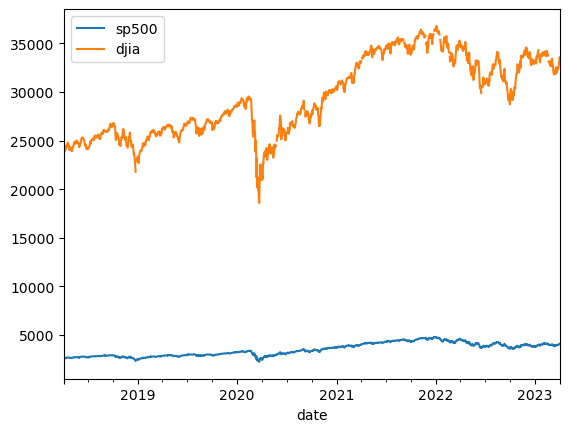

In [5]:
financial[["date","sp500","djia"]].set_index("date").plot()

In [6]:
financial['djia_rescale'] = financial['djia']/10

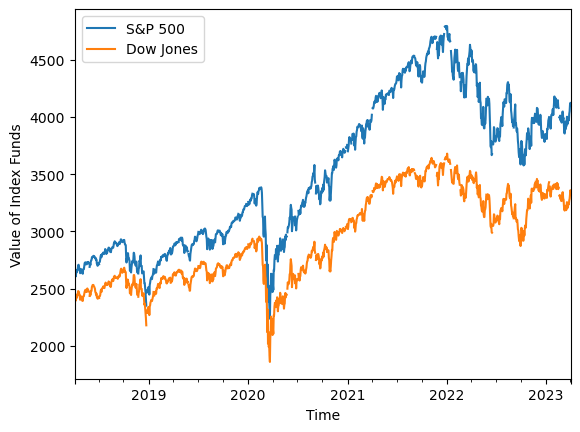

In [7]:
# Enter the x-axis column and y-axis columns you 
# wish to include. Specify the x-axis column with "set_index()"
# This applies to any line plot, with or without dates
# The legend is the box with the name of the lines
# If you drop the ".legend()" command this will assign
# the default column names to the legend.


financial[["date","sp500","djia_rescale"]].set_index("date").plot()
plt.xlabel("Time")
plt.ylabel("Value of Index Funds")
plt.legend(["S&P 500","Dow Jones"])


<font size = "5">

Remarks ...

- The S\&P 500 and Dow Jones have different units.
- More sensibile to compare their growth rate!


# <span style="color:darkblue"> II. Time Difference/Growth </span>

<font size = "5">

Change between periods

In [8]:
financial

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,djia_rescale
0,4/4/2018,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04",4-Apr-18,2018-04-04,2426.430
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05,2450.522
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06,2393.276
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09,2397.910
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10,2440.800
...,...,...,...,...,...,...,...,...
1300,3/29/2023,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29",29-Mar-23,2023-03-29,3271.760
1301,3/30/2023,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30",30-Mar-23,2023-03-30,3285.903
1302,3/31/2023,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31",31-Mar-23,2023-03-31,3327.415
1303,4/3/2023,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03",3-Apr-23,2023-04-03,3360.115


In [9]:
# First sort columns by date. The second computes the
# differences in "sp500" between each row and the one before it
# By convention, the first row gets a missing value because
# there is nothing to compare. For this to work, it's important
# that the dataset is sorted.

financial["diff_sp500"] = financial["sp500"].diff()

<font size = "5">

Compute lag + percentage growth

In [10]:
financial["lag_sp500"]    = financial["sp500"].shift(1)

In [11]:
# ".shif(1)" compute a new column with the value of "sp500"
# one period before. By convention the first column is assigned
# a missing value
# We can combine ".diff()" and ".shift()" to compute growth rates


financial["growth_sp500"] = (financial["diff_sp500"]/financial["lag_sp500"])* 100

<font size = "5">

Time between dates

In [12]:
financial

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,djia_rescale,diff_sp500,lag_sp500,growth_sp500
0,4/4/2018,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04",4-Apr-18,2018-04-04,2426.430,NaN,NaN,NaN
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05,2450.522,18.15,2644.69,0.686281
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06,2393.276,-58.37,2662.84,-2.192021
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09,2397.910,8.69,2604.47,0.333657
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10,2440.800,43.71,2613.16,1.672687
...,...,...,...,...,...,...,...,...,...,...,...
1300,3/29/2023,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29",29-Mar-23,2023-03-29,3271.760,56.54,3971.27,1.423726
1301,3/30/2023,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30",30-Mar-23,2023-03-30,3285.903,23.02,4027.81,0.571526
1302,3/31/2023,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31",31-Mar-23,2023-03-31,3327.415,58.48,4050.83,1.443655
1303,4/3/2023,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03",3-Apr-23,2023-04-03,3360.115,15.20,4109.31,0.369892


In [13]:
# In the financial data example, the price of the stock portfolios isn't recorded
# on weekends. Sometimes it's important to account for these differences in the
# legnth between time periods, when accounting for growth rates
# Can compute dt.days, dt.months, dt.year, etc.

financial["diff_date"]  = financial["date"]-financial["date"].shift(1)
financial["count_days"] = financial["diff_date"].dt.days

<font size = "5">

Plot growth

Text(0.5, 1.0, 'Change in the S&P 500 Index')

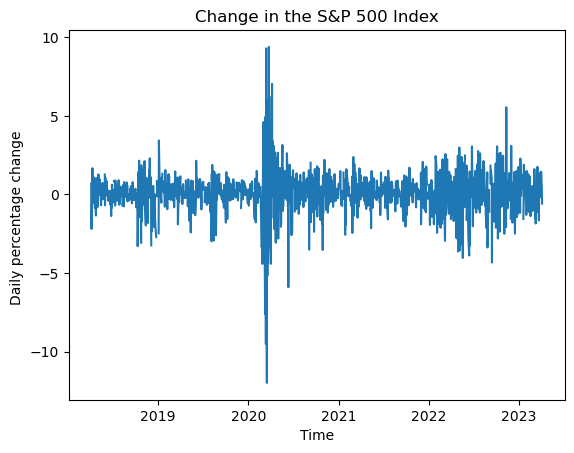

In [14]:
plt.plot("date", "growth_sp500",
          data = financial)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("Change in the S&P 500 Index")

<font size = "5" >

Try it yourself!

- Compute a column with the growth of the Dow Jones
- Plot the growth of the S&P 500 and Dow Jones in a <br>
single plot

Text(0.5, 1.0, 'Change in Dow Jones Index')

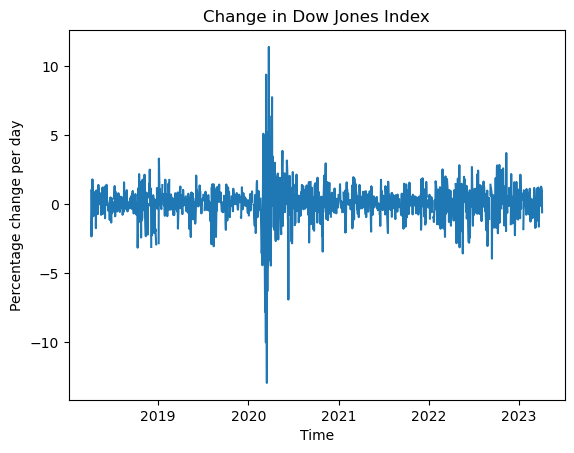

In [15]:
# Write your own code
financial["diff_djia"] = financial["djia"].diff()
financial["lag_djia"] = financial["djia"].shift(1)
financial["growth_djia"] = (financial["diff_djia"]/financial["lag_djia"])*100

plt.plot("date","growth_djia", 
         data=financial)
plt.xlabel("Time")
plt.ylabel("Percentage change per day")
plt.title("Change in Dow Jones Index")

Text(0, 0.5, 'Percentage change in growth')

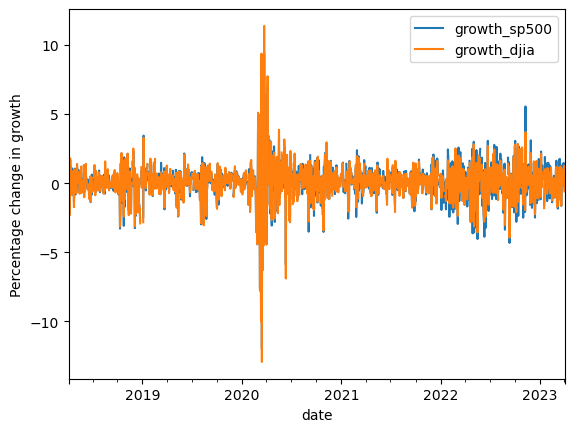

In [16]:
financial[["date", "growth_sp500", "growth_djia"]].set_index("date").plot()
plt.ylabel("Percentage change in growth")        


# <span style="color:darkblue"> III. Subsetting with time data </span>

<font size = "5" >

Subsetting before/after

In [17]:
# Since the "date" column has a time format, Python
# will interpret "2019-01-01" as a date inside the query command
# Note: remember that you have to use single quotations for ".query()"

subset_before  = financial.query('date <= "2019-01-01" ')
subset_after   = financial.query('date >= "2020-01-01" ')

In [18]:
max(subset_before['date'])

Timestamp('2019-01-01 00:00:00')

<font size = "5" >

Subsetting between two dates

In [19]:
# This command applies the function ".between()" to the column

subset_between = financial.query('date.between("2020-03-01","2020-05-01")')

<font size = "5">

Flag observations

In [20]:
financial["bool_period"]  = financial["date"].between("2020-03-01","2020-05-01")
financial["bool_example"] = financial["growth_sp500"] > 5

<font size = "5">

Plot results

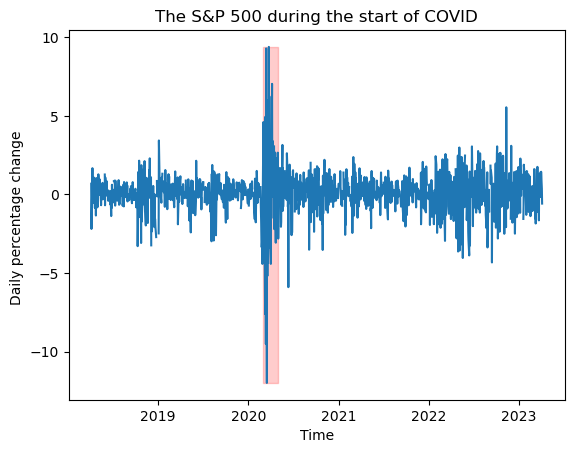

In [21]:
# Create a line plot
plt.plot("date", "growth_sp500", data = financial)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("The S&P 500 during the start of COVID")

# Add a shaded region wth a rectangle
# "x" is the x-coordinates, "y1" and "y2" are the lower
# and upper bounds of the rectangle. We can set this
# to be the minimum and meximum of the outcome.
# we use "where" to test a logical condition

vec_y = financial["growth_sp500"]
plt.fill_between(x= financial["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = financial["bool_period"],
                 alpha = 0.2,color = "red")

plt.show()

<font size = "5">

Try it yourself!

- Generate a plot of the daily growth of the Dow Jones 
- Highlight regions where there was growth higher than 4\% <br>
or below -4\%

In [21]:
# Write your own code





# <span style="color:darkblue"> IV. Wide and Long Format </span>

<font size = "5">

Data can come in a wide variety of formats

- Few rows, multiple columns (wide)
- Stacked rows, few columns (long)
- The **information** is the same!

<font size = "5">

Wide to long

$\quad$ <img src="figures/melt_fig.png" alt="drawing" width="550"/>

In [25]:
financial

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,djia_rescale,diff_sp500,lag_sp500,growth_sp500,diff_date,count_days,diff_djia,lag_djia,growth_djia,bool_period,bool_example
0,4/4/2018,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04",4-Apr-18,2018-04-04,2426.430,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,False,False
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05,2450.522,18.15,2644.69,0.686281,1 days,1.0,240.92,24264.30,0.992899,False,False
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06,2393.276,-58.37,2662.84,-2.192021,1 days,1.0,-572.46,24505.22,-2.336074,False,False
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09,2397.910,8.69,2604.47,0.333657,3 days,3.0,46.34,23932.76,0.193626,False,False
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10,2440.800,43.71,2613.16,1.672687,1 days,1.0,428.90,23979.10,1.788641,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3/29/2023,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29",29-Mar-23,2023-03-29,3271.760,56.54,3971.27,1.423726,1 days,1.0,323.35,32394.25,0.998171,False,False
1301,3/30/2023,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30",30-Mar-23,2023-03-30,3285.903,23.02,4027.81,0.571526,1 days,1.0,141.43,32717.60,0.432275,False,False
1302,3/31/2023,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31",31-Mar-23,2023-03-31,3327.415,58.48,4050.83,1.443655,1 days,1.0,415.12,32859.03,1.263336,False,False
1303,4/3/2023,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03",3-Apr-23,2023-04-03,3360.115,15.20,4109.31,0.369892,3 days,3.0,327.00,33274.15,0.982745,False,False


In [25]:
financial_long = pd.melt(financial,
                         var_name = "portfolio_type",
                         value_name = "portfolio_value",
                         id_vars=['date','date_str'],
                         value_vars=['sp500','djia','djia_rescale'])

In [26]:
financial_long.sort_values(by='date')

,date,date_str,portfolio_type,portfolio_value
0,2018-04-04,4/4/2018,sp500,2644.690
2610,2018-04-04,4/4/2018,djia_rescale,2426.430
1305,2018-04-04,4/4/2018,djia,24264.300
1,2018-04-05,4/5/2018,sp500,2662.840
2611,2018-04-05,4/5/2018,djia_rescale,2450.522
...,...,...,...,...
1303,2023-04-03,4/3/2023,sp500,4124.510
2608,2023-04-03,4/3/2023,djia,33601.150
2609,2023-04-04,4/4/2023,djia,33402.380
1304,2023-04-04,4/4/2023,sp500,4100.600


<font size = "5">

Long to wide

$\quad$ <img src="figures/pivot_fig.png" alt="drawing" width="550"/>

In [27]:
financial_wide = (pd.pivot(financial_long,
                           index = 'date',
                           columns = 'portfolio_type',
                           values =  'portfolio_value'))

# If you also want the index to be part of the dataset add
# ".reset_index()" to the end of the previous command

In [26]:
financial_wide

portfolio_type,djia,sp500
date,,
2018-04-04,24264.30,2644.69
2018-04-05,24505.22,2662.84
2018-04-06,23932.76,2604.47
2018-04-09,23979.10,2613.16
2018-04-10,24408.00,2656.87
...,...,...
2023-03-29,32717.60,4027.81
2023-03-30,32859.03,4050.83
2023-03-31,33274.15,4109.31


<font size = "5">

Try it yourself!

- Convert the "growth_sp500" and <br>
"growth_djia" to long format

In [27]:
# Write your own code
# Note: You can give any custom value to "var_name" or "value_name"

